# Correlation Between Day/Night Time Citibike Trips

In [ ]:
__author__ = 'Solution by Linda Jaber, CUSP NYU 2018, Principles of Urban Informatics'

import os
import pandas as pd
import numpy as np
from zipfile import ZipFile
from scipy import stats

import pylab as pl
%pylab inline

In [ ]:
# setting the environment to download data
PUIdata = os.getenv('PUIDATA')
if PUIdata is None:
    os.environ['PUIDATA'] = '%s/PUIdata'%os.getenv('HOME')
    PUIdata = os.getnev('PUIDATA')
print('PUIdata: ', PUIdata)

## Import and Read Data

In [ ]:
# importing and unzipping data into PUIDATA
!curl https://s3.amazonaws.com/tripdata/JC-201705-citibike-tripdata.csv.zip > 201705-citibike-tripdata.csv.zip
!mv 201705-citibike-tripdata.csv.zip $PUIDATA/citibike
zip = ZipFile('%s/citibike/201705-citibike-tripdata.csv.zip'%os.getenv('PUIDATA'))
zip.extractall('%s/citibike'%os.getenv('PUIDATA'))

In [ ]:
ls $PUIDATA/citibike

In [5]:
# reading the file with pandas
df = pd.read_csv(PUIdata + '/citibike/JC-201705-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,347,2017-05-01 00:03:19,2017-05-01 00:09:06,3276,Marin Light Rail,40.714584,-74.042817,3214,Essex Light Rail,40.712774,-74.036486,26177,Subscriber,1958.0,1
1,108,2017-05-01 00:16:04,2017-05-01 00:17:53,3275,Columbus Drive,40.718355,-74.038914,3187,Warren St,40.721124,-74.038051,26266,Subscriber,1963.0,1
2,165,2017-05-01 00:29:59,2017-05-01 00:32:44,3267,Morris Canal,40.712419,-74.038526,3275,Columbus Drive,40.718355,-74.038914,26168,Subscriber,1988.0,1
3,289,2017-05-01 00:30:47,2017-05-01 00:35:36,3209,Brunswick St,40.724176,-74.050656,3205,JC Medical Center,40.716540,-74.049638,26273,Subscriber,1986.0,2
4,115,2017-05-01 00:41:14,2017-05-01 00:43:09,3185,City Hall,40.717733,-74.043845,3213,Van Vorst Park,40.718489,-74.047727,26293,Subscriber,1983.0,1


In [6]:
# adding a date column, a start hour column, and a trip duration by minute column to df
df['date'] = pd.to_datetime(df['starttime'])
df['start_hr'] = df['date'].dt.hour
df['trip_duration(min)'] = (df['tripduration'] / 60).round()

## Split Data

In [7]:
# spliting the data by trip day/night time and looking at trip duration
df['day_time'] = df['trip_duration(min)'][(df['start_hr'] > 6.0) & (df['start_hr'] <= 18.0)]
df['night_time'] = df['trip_duration(min)'][(df['start_hr'] <= 6 )|(df['start_hr'] > 18)]

In [8]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'start_hr', 'trip_duration(min)',
       'day_time', 'night_time'],
      dtype='object')

In [9]:
#creating a new dataframe df_n with only two columns
df_n = df[['day_time', 'night_time']]
df_n.head()

,day_time,night_time
0,NaN,6.0
1,NaN,2.0
2,NaN,3.0
3,NaN,5.0
4,NaN,2.0


In [10]:
df_n.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,day_time,night_time
count,19229.000000,6737.000000
mean,15.831765,17.811340
std,230.035998,440.825393
min,1.000000,1.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,23525.000000,27122.000000


In [11]:
# droppin Nans
df_n['day_time'].dropna(inplace=True)
df_n['night_time'].dropna(inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


([<matplotlib.axis.YTick at 0x7f4c20292278>,
 <a list of 16 Text yticklabel objects>)

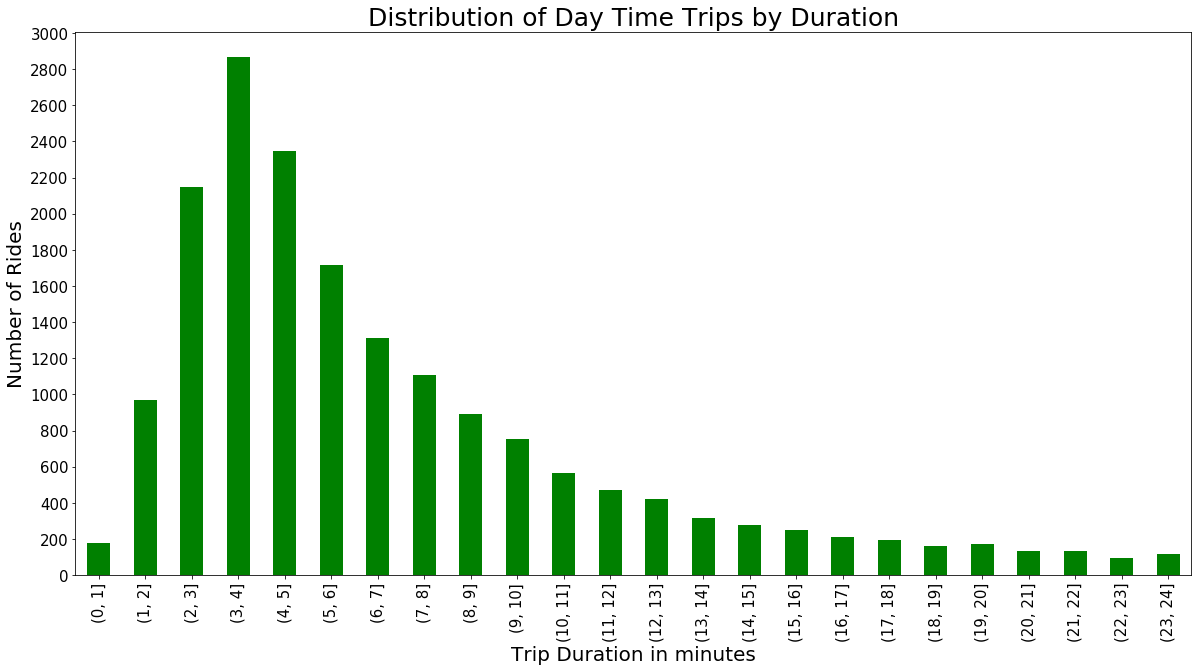

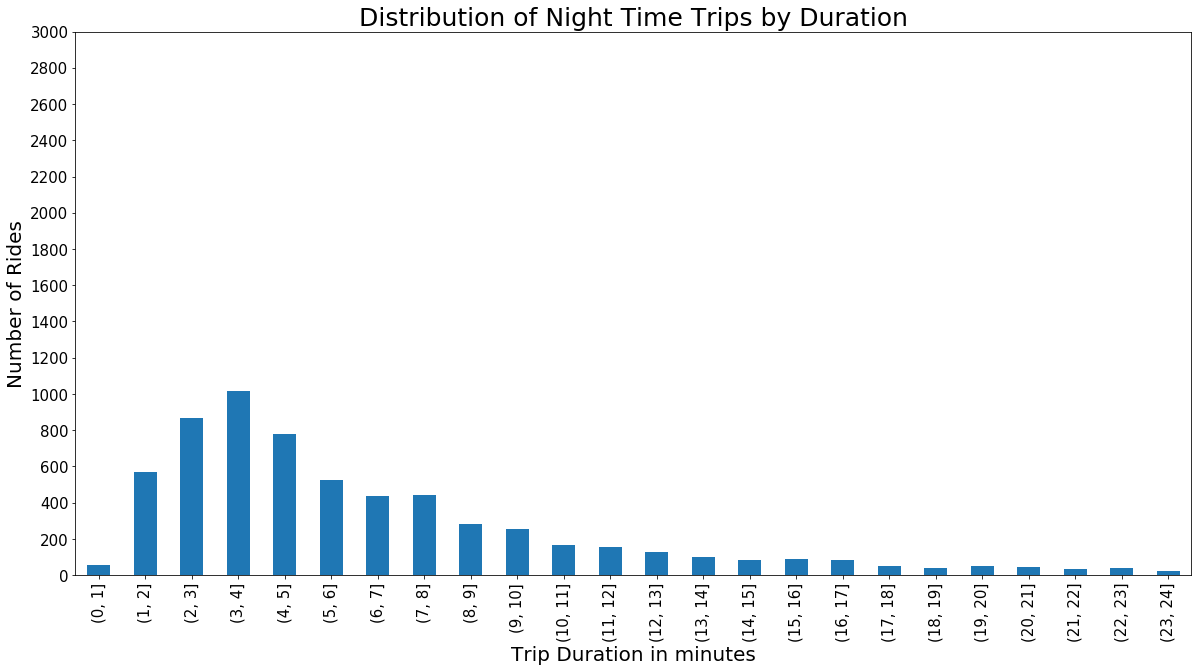

In [12]:
pl.figure(dpi=150)

# bins size
bins = np.arange(0,25,1)

ax_d = df_n.day_time.groupby(pd.cut(df_n.day_time, bins)).agg([count_nonzero]).plot(kind='bar',color='green', legend=False, figsize=(20,10))
ax_d.set_title('Distribution of Day Time Trips by Duration', fontsize=25)
ax_d.set_xlabel('Trip Duration in minutes', fontsize=20)
ax_d.set_ylabel('Number of Rides', fontsize=20)
pl.xticks(fontsize=15)
pl.yticks(np.arange(0,3001,200), fontsize=15)


ax_n = df_n.night_time.groupby(pd.cut(df_n.night_time, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(20,10))
ax_n.set_title('Distribution of Night Time Trips by Duration', fontsize=25)
ax_n.set_xlabel('Trip Duration in minutes', fontsize=20)
ax_n.set_ylabel('Number of Rides', fontsize=20)
pl.xticks(fontsize=15)
pl.yticks(np.arange(0,3001,200), fontsize=15)


**Figure 1:** Histograms showing the distribution of trip duration in minutes for day time and night time trips respectively. W can clearly see that both distributions are positively skewed with a peak at 3 to 4 minutes. However the difference in the number of rides between the day and the night is significant. The number of of rides at night drops to almost the third the number during day time. 

            count_nonzero
night_time               
(0, 1]           0.001044
(1, 2]           0.034234
(2, 3]           0.050872
(3, 4]           0.050543
(4, 5]           0.041901
(5, 6]           0.028659
(6, 7]           0.024248
(7, 8]           0.031882
(8, 9]           0.026888
(9, 10]          0.024790
(10, 11]         0.019659
(11, 12]         0.017920
(12, 13]         0.014620
(13, 14]         0.012409
(14, 15]         0.010176
(15, 16]         0.010415
(16, 17]         0.012044
(17, 18]         0.008726
(18, 19]         0.006222
(19, 20]         0.004410
(20, 21]         0.003681
(21, 22]         0.001734
(22, 23]         0.002878
(23, 24]         0.000000


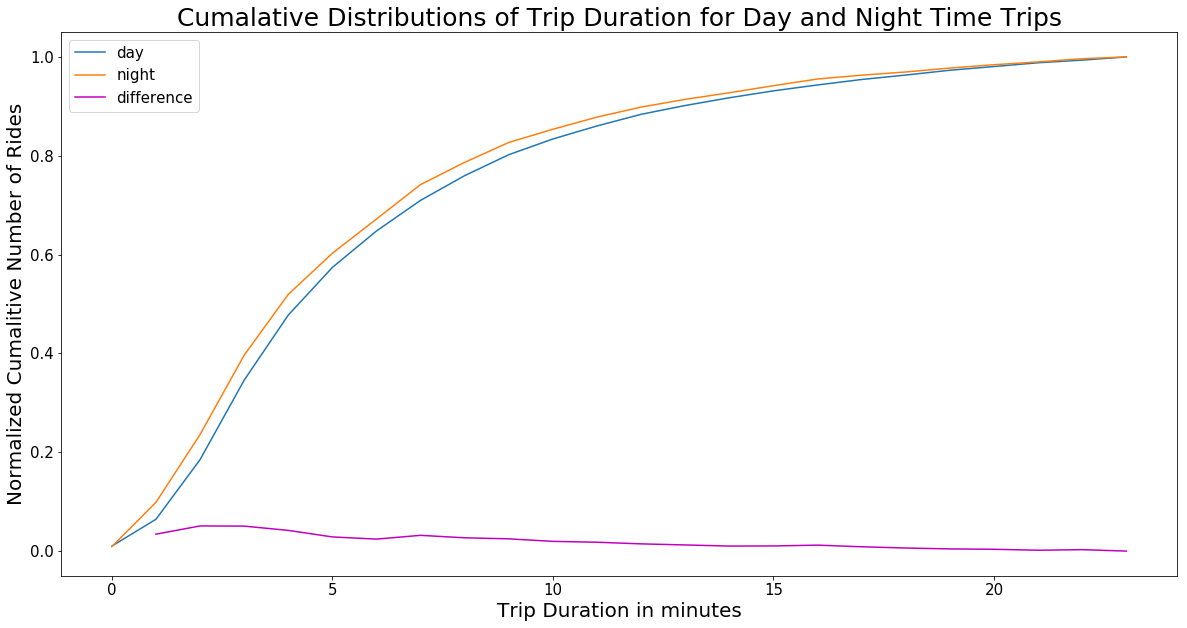

In [13]:
cs_d = df_n.day_time.groupby(pd.cut(df_n.day_time, bins)).agg([count_nonzero]).cumsum()
cs_n = df_n.night_time.groupby(pd.cut(df_n.night_time, bins)).agg([count_nonzero]).cumsum()

print (np.abs(cs_n / cs_n.max() - cs_d / cs_d.max()))

pl.figure(figsize = (20,10))

pl.plot(bins[:-1], cs_d / cs_d.max(), label='day')
pl.plot(bins[:-1], cs_n / cs_n.max(), label='night')
pl.plot(bins[:-1], np.sqrt(cs_n / cs_n.max() - cs_d / cs_d.max()) ** 2, 'm-', label='difference' )

pl.title('Cumalative Distributions of Trip Duration for Day and Night Time Trips', fontsize=25)
pl.xlabel('Trip Duration in minutes', fontsize=20)
pl.ylabel('Normalized Cumalitive Number of Rides', fontsize=20)
pl.xticks(fontsize=15)
pl.yticks(fontsize=15)
pl.legend(fontsize=15)

**Figure2:** The figure shows three curves, the cumalative distributions of trips duration during the day time and during the night time as well as their difference. They look similar with a difference up to 3%. Conducting some tests will help us see if there is any significant differences.

## Significance level $\alpha$ = 0.5
## KS test to Compare Two Samples

### Null Hypothesis: 
**The two samples -trip duration during the day and trip duration during the night- come from the same poulation and there is no difference between them.**

In [14]:
alpha = 0.05

D, p = stats.ks_2samp(df_n.day_time, df_n.night_time)

print ('KS statistic = {0:.2f}\np-value = {1:.3f}'.format(D,p))

def result(p,a):
    print ('Is the p_value = ' + 
           '{0:.2f} smaller than alpha level = {1:.2f}?'.format(p,a))
    if p < a:
        print ('YES!')
    else: 
        print ('NO!')
    
    print ('Then the Null hypothesis {}'.format(
        'is rejected.' if p < a  else 'holds.') )

    
result(p, alpha)


KS statistic = 0.05
p-value = 0.000
Is the p_value = 0.00 smaller than alpha level = 0.05?
YES!
Then the Null hypothesis is rejected.


## KS test with a subset 200 times smaller

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

In [15]:
# subsetting the dataftame
df_s = df_n.sample(round(len(df_n)/200),random_state=123)

# droppin Nans
df_s['day_time'].dropna(inplace=True)
df_s['night_time'].dropna(inplace=True)

D, p = stats.ks_2samp(df_s.day_time, df_s.night_time)

print ('KS statistic = {0:.2f}\np-value = {1:.2f}'.format(D,p))

def result(p,a):
    print ('Is the p_value = ' + 
           '{0:.2f} smaller than alpha level = {1:.2f}?'.format(p,a))
    if p < a:
        print ('YES!')
    else: 
        print ('NO!')
    
    print ('Then the Null hypothesis {}'.format(
        'is rejected.' if p < a  else 'holds.') )

    
result(p, alpha)

KS statistic = 0.13
p-value = 0.75
Is the p_value = 0.75 smaller than alpha level = 0.05?
NO!
Then the Null hypothesis holds.


## Pearson's test for correlation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

### Null Hypothesis: 
**The two samples -trip duration during the day and trip duration during the night- are not linearly correlated.**

In [16]:
# Samples in pearson's test must be equal
# subsetting each sample (size = 550)
np.random.seed(1234)
day_time_s = np.random.choice(df_n.day_time, 2000, replace=False)
night_time_s = np.random.choice(df_n.night_time, 2000, replace=False)

r, p = stats.pearsonr(day_time_s, night_time_s)

print ('Pearson’s correlation coefficient = {0:.5f}\np-value = {1:.2f}'.format(r,p))

def result(p,a):
    print ('Is the p_value = ' + 
           '{0:.2f} smaller than alpha level = {1:.2f}?'.format(p,a))
    if p < a:
        print ('YES!')
    else: 
        print ('NO!')
    print ('Pearson\'s correlation coefficient is very low close to zero implying that there is a very week correlation.')
    print ('Then the Null hypothesis {}'.format(
        'is rejected.' if p < a  else 'holds.') )

    
result(p, alpha)

Pearson’s correlation coefficient = 0.00808
p-value = 0.72
Is the p_value = 0.72 smaller than alpha level = 0.05?
NO!
Pearson's correlation coefficient is very low close to zero implying that there is a very week correlation.
Then the Null hypothesis holds.


## Spearman's test for correlation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

### Null Hypothesis: 
**The two samples -trip duration during the day and trip duration during the night- are not linearly correlated.**

In [17]:
# Samples in spearman's test must be equal
# subsetting each sample (size = 550)
np.random.seed(1234)
day_time_s = np.random.choice(df_n.day_time, 2000, replace=False)
night_time_s = np.random.choice(df_n.night_time, 2000, replace=False)

r, p = stats.spearmanr(day_time_s, night_time_s)

print ('Pearson’s correlation coefficient = {0:.5f}\np-value = {1:.2f}'.format(r,p))

def result(p,a):
    print ('Is the p_value = ' + 
           '{0:.2f} smaller than alpha level = {1:.2f}?'.format(p,a))
    if p < a:
        print ('YES!')
    else: 
        print ('NO!')
    print ('Pearson\'s correlation coefficient is very low close to zero implying that there is a very week correlation.')
    print ('Then the Null hypothesis {}'.format(
        'is rejected.' if p < a  else 'holds.') )

    
result(p, alpha)

Pearson’s correlation coefficient = -0.01961
p-value = 0.38
Is the p_value = 0.38 smaller than alpha level = 0.05?
NO!
Pearson's correlation coefficient is very low close to zero implying that there is a very week correlation.
Then the Null hypothesis holds.
